# LOGISTIC REGRESSION

In [0]:
import pandas as pd
import numpy as np

In [6]:
import multiprocessing
multiprocessing.Pool(processes=8)

In [0]:
df = pd.read_csv('sgemm_product.csv')

In [0]:
#Making the Mean Run Time as the target variable.
df2 = df.assign(Run = (df['Run1 (ms)'] + df['Run2 (ms)']  + df['Run3 (ms)']  + df['Run4 (ms)'] )/4)
df2 = df2.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'])

#Creating the feature and Target Variables
X = df2.iloc[:,:14]
y = df2['Run']

In [9]:
from sklearn.preprocessing import StandardScaler
X.iloc[:,:10] = StandardScaler().fit_transform(X.iloc[:,:10])
y_mean = y.mean()
y_sd = y.std()
y = (y-y_mean)/y_sd
print(y)
print(X)

0        -0.274446
1        -0.376588
2        -0.371544
3        -0.355076
4        -0.268229
            ...   
241595   -0.541707
241596   -0.492303
241597   -0.494676
241598   -0.512866
241599   -0.541707
Name: Run, Length: 241600, dtype: float64
             MWG       NWG       KWG     MDIMC  ...  STRM  STRN  SA  SB
0      -1.516757 -1.516757 -1.210997 -0.753894  ...     0     0   0   0
1      -1.516757 -1.516757 -1.210997 -0.753894  ...     0     0   0   1
2      -1.516757 -1.516757 -1.210997 -0.753894  ...     0     0   1   0
3      -1.516757 -1.516757 -1.210997 -0.753894  ...     0     0   1   1
4      -1.516757 -1.516757 -1.210997 -0.753894  ...     0     1   0   0
...          ...       ...       ...       ...  ...   ...   ...  ..  ..
241595  1.120452  1.120452  0.825766  2.294249  ...     1     0   1   1
241596  1.120452  1.120452  0.825766  2.294249  ...     1     1   0   0
241597  1.120452  1.120452  0.825766  2.294249  ...     1     1   0   1
241598  1.120452  1.120452  0

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#creating classes using the Median
print(y.median())
y_train_class = []
for i in y_train:
    if i > -0.40076444381591425:
        x = 1
        y_train_class.append(x)
    else:
        x = 0
        y_train_class.append(x)

y_test_class = []
for i in y_test:
    if i > -0.40076444381591425:
        x = 1
        y_test_class.append(x)
    else:
        x = 0
        y_test_class.append(x)
        
n_samples, n_features = X_train.shape

-0.40076444381591425


In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [26]:
#running LOGISTIC for various Learing Rates
LOG_LRtrain = {}
LOG_LRcost = {}

LOG_LRtest = {}
dw_l = []
for lr in [0.1,0.5,0.01,0.03]:   
    weights = np.zeros(n_features)
    LOG_LRtrain['LRtrain_%s' % lr] = []
    LOG_LRtest['LRtest_%s' % lr] = []
    LOG_LRcost['LRcost_%s' % lr] = []
    for iteration in range(0,1000):
        lin_y_train = np.dot(X_train, weights)
        y_train_pred = sigmoid(lin_y_train)
        
        dw = (1/n_samples)*np.dot(X_train.T,(y_train_pred-np.asarray(y_train_class)))
        dw_l.append(dw.sum())
        
        weights = weights - lr*dw
        
        lin_y_train = np.dot(X_train, weights) 
        y_train_pred = sigmoid(lin_y_train)
        y_train_pred_class = []
        for i in y_train_pred:
            if i > 0.40112868791012124:        #this is the sigmoid(y_median) so we know how to classify
                x=1
                y_train_pred_class.append(x)
            else:
                x=0
                y_train_pred_class.append(x)
        
        accuracy_train = (np.asarray(y_train_pred_class) == np.asarray(y_train_class)).sum() / len(y_train_class)
        
        lin_y_test = np.dot(X_test, weights) 
        y_test_pred = sigmoid(lin_y_test)
        y_test_pred_class = []
        for i in y_test_pred:
            if i > 0.40112868791012124:
                x=1
                y_test_pred_class.append(x)
            else:
                x=0
                y_test_pred_class.append(x)
        
        accuracy_test = (np.asarray(y_test_pred_class) == np.asarray(y_test_class)).sum() / len(y_test_class)
        class1_cost = -np.asarray(y_test_class)*np.log((y_test_pred))
        class2_cost = (1-np.asarray(y_test_class))*np.log(1-y_test_pred)
        cost = (class1_cost - class2_cost).sum() / len(y_test_class)
        
        LOG_LRcost['LRcost_%s' % lr].append(cost)
   
        LOG_LRtest['LRtest_%s' % lr].append(accuracy_test)
        LOG_LRtrain['LRtrain_%s' % lr].append(accuracy_train)
    print("The accuracy of the test set is :" ,accuracy_test)
    print("The accuracy of the train set is:",accuracy_train)

The accuracy of the test set is : 0.7949227373068433
The accuracy of the train set is: 0.7942999053926206
The accuracy of the test set is : 0.7949089403973509
The accuracy of the train set is: 0.7944063386944181
The accuracy of the test set is : 0.7638520971302428
The accuracy of the train set is: 0.7652377010406812
The accuracy of the test set is : 0.7898730684326711
The accuracy of the train set is: 0.7898119678334911


In [0]:
#for plotting
iterations = []
for i in range (0,1000):
    iterations.append(i)

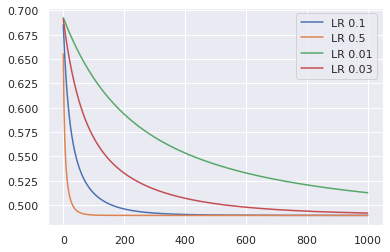

In [28]:
#Plotting Cost vs Iterations on different Learning Rates
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.1'],legend='brief', label='LR 0.1')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.5'],legend='brief', label='LR 0.5')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.03'],legend='brief', label='LR 0.03')
plt.show()

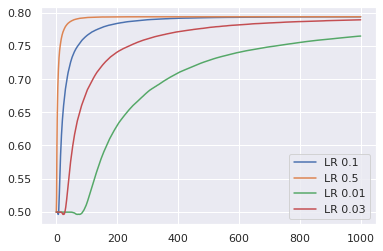

In [29]:
#Plotting Train Accuracy vs Iterations on different Learning Rates
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.1'],legend='brief', label='LR 0.1')
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.5'],legend='brief', label='LR 0.5')
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.03'],legend='brief', label='LR 0.03')
plt.show()

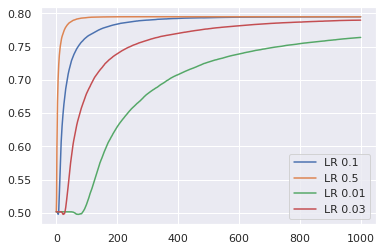

In [30]:

#Plotting Test Accuracy vs Iterations on Different Learning Rates
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.1'],legend='brief', label='LR 0.1')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.5'],legend='brief', label='LR 0.5')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.03'],legend='brief', label='LR 0.03')
plt.show()


In [19]:
#finding convergence
LOG_LRtrain = {}
LOG_LRcost = {}

LOG_LRtest = {}
for lr in [0.3]:   
    weights = np.zeros(n_features)
    LOG_LRtrain['LRtrain_%s' % lr] = []
    LOG_LRtest['LRtest_%s' % lr] = []
    LOG_LRcost['LRcost_%s' % lr] = []
    dw_l = []
    for iteration in range(0,100):
        lin_y_train = np.dot(X_train, weights)
        y_train_pred = sigmoid(lin_y_train)
        
        dw = (1/n_samples)*np.dot(X_train.T,(y_train_pred-np.asarray(y_train_class)))
        dw_l.append(dw.sum())
        
        weights = weights - lr*dw
        
        lin_y_train = np.dot(X_train, weights) 
        y_train_pred = sigmoid(lin_y_train)
        y_train_pred_class = []
        for i in y_train_pred:
            if i > 0.40112868791012124:        #this is the sigmoid(y_median) so we know how to classify
                x=1
                y_train_pred_class.append(x)
            else:
                x=0
                y_train_pred_class.append(x)
        
        accuracy_train = (np.asarray(y_train_pred_class) == np.asarray(y_train_class)).sum() / len(y_train_class)
        
        lin_y_test = np.dot(X_test, weights) 
        y_test_pred = sigmoid(lin_y_test)
        y_test_pred_class = []
        for i in y_test_pred:
            if i > 0.40112868791012124:
                x=1
                y_test_pred_class.append(x)
            else:
                x=0
                y_test_pred_class.append(x)
        
        accuracy_test = (np.asarray(y_test_pred_class) == np.asarray(y_test_class)).sum() / len(y_test_class)
        class1_cost = -np.asarray(y_test_class)*np.log((y_test_pred))
        class2_cost = (1-np.asarray(y_test_class))*np.log(1-y_test_pred)
        cost = (class1_cost - class2_cost).sum() / len(y_test_class)
        
        LOG_LRcost['LRcost_%s' % lr].append(cost)
   
        LOG_LRtest['LRtest_%s' % lr].append(accuracy_test)
        LOG_LRtrain['LRtrain_%s' % lr].append(accuracy_train)
    print("The accuracy of the test set is :" ,accuracy_test)
    print("The accuracy of the train set is :" ,accuracy_train)

The accuracy of the test set is : 0.7899834437086093
The accuracy of the train set is : 0.7899597918637654


In [0]:
#finding the iteration of Convergence of Gradient
w = abs(np.diff(dw_l)) < 0.001
w = list(w)
a = w.index(True)

w = abs(np.diff(dw_l)) < 0.01
w = list(w)
b = w.index(True)

w = abs(np.diff(dw_l)) < 0.1
w = list(w)
c = w.index(True)

In [0]:
#plotting the convergence for Training Data
iterations = []
for i in range (0,100):
    iterations.append(i)
    

CT_dot01_train = []
for i in range (0,100):
    if i < c:
        CT_dot01_train.append(LOG_LRtrain['LRtrain_0.3'][i])
    else:
        CT_dot01_train.append(LOG_LRtrain['LRtrain_0.3'][c])

CT_dot001_train = []
for i in range (0,100):
    if i < b:
        CT_dot001_train.append(LOG_LRtest['LRtest_0.3'][i])
    else:
        CT_dot001_train.append(LOG_LRtest['LRtest_0.3'][b])
        
CT_dot0001_train = []
for i in range (0,100):
    if i < a:
        CT_dot0001_train.append(LOG_LRtrain['LRtrain_0.3'][i])
    else:
        CT_dot0001_train.append(LOG_LRtrain['LRtrain_0.3'][a])
        

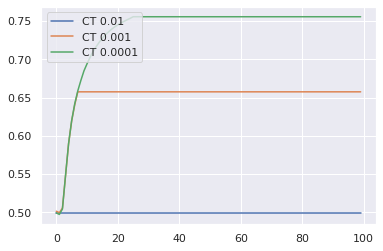

In [22]:
#Plotting Train Accuracy vs Iterations for different Thresholds
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=CT_dot01_train,legend='brief', label='CT 0.01')
ax = sns.lineplot(x=iterations, y=CT_dot001_train,legend='brief', label='CT 0.001')
ax = sns.lineplot(x=iterations, y=CT_dot0001_train,legend='brief', label='CT 0.0001')
plt.show()

In [0]:
#similarly for test set

CT_dot0001 = []
for i in range (0,100):
    if i < 249:
        CT_dot0001.append(LOG_LRtest['LRtest_0.3'][i])
    else:
        CT_dot0001.append(LOG_LRtest['LRtest_0.3'][c])

CT_dot001 = []
for i in range (0,100):
    if i < 157:
        CT_dot001.append(LOG_LRtest['LRtest_0.3'][i])
    else:
        CT_dot001.append(LOG_LRtest['LRtest_0.3'][b])

CT_dot01 = []
for i in range (0,100):
    if i < 21:
        CT_dot01.append(LOG_LRtest['LRtest_0.3'][i])
    else:
        CT_dot01.append(LOG_LRtest['LRtest_0.3'][a])

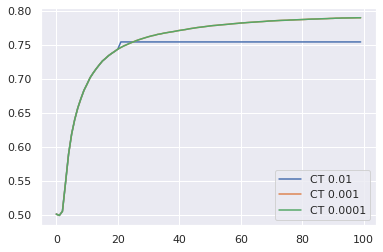

In [24]:
#plotting Test Accuracy vs Iterations for different Thresholds
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=CT_dot01,legend='brief', label='CT 0.01')
ax = sns.lineplot(x=iterations, y=CT_dot001,legend='brief', label='CT 0.001')
ax = sns.lineplot(x=iterations, y=CT_dot0001,legend='brief', label='CT 0.0001')
plt.show()